<a href="https://colab.research.google.com/github/neetinds/Stock-Price-Prediction/blob/main/Amazon_Price_Prediction_Using_LSTM_%26_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Price Prediction Using LSTM & ARIMA**





## **1. Stock Price Predicting with LSTM**

Neural Networks have been demonstrated to be very powerful in solving the real-world problems like imaging and natural language processing. Interested in stock price movements, I am therefore motivated and curious about employing nerual nets to approach financial time series problems of its kind.

Unlike common regression predictions, time series problems are more difficult due to sequence dependence within the input data variables. Among various neural nets, Long Short-Term Memory (LSTM), a type of recurrent neural network, has been proven to take care of complex time series predictions. So I implement LSTM to Amazon's stock prices (AMZN)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import preprocessing
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

Mount my GDRIVE

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 1. Load Data
Get up to five-year daily historical stock prices & volumes data from https://finance.yahoo.com/quote/AMZN/history?p=AMZN.

Datasets consist of following columns:


*   **Date Time** stamp of when data was collected, being used as index column;

*   **Volume** The number of shares traded in AMZN during a given trading day;



*   **Open** The price at AMZN upon the opening of an exchange on a given trading day


*   **High** The highest price at which AMZN traded during the course of the day

*   **Low** The lowest price at which AMZN traded during the course of the day;


*   **Close** The final price at which AMZN traded during the course of the day; it is also selected as our target data.

In [5]:
data = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Time Series - Stock Price Prediction - AMZN/AMZN.csv')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2518 non-null   object 
 1   Open       2518 non-null   float64
 2   High       2518 non-null   float64
 3   Low        2518 non-null   float64
 4   Close      2518 non-null   float64
 5   Adj Close  2518 non-null   float64
 6   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 137.8+ KB


In [7]:
#Change the date foramt and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

In [8]:
data.shape

(2518, 6)

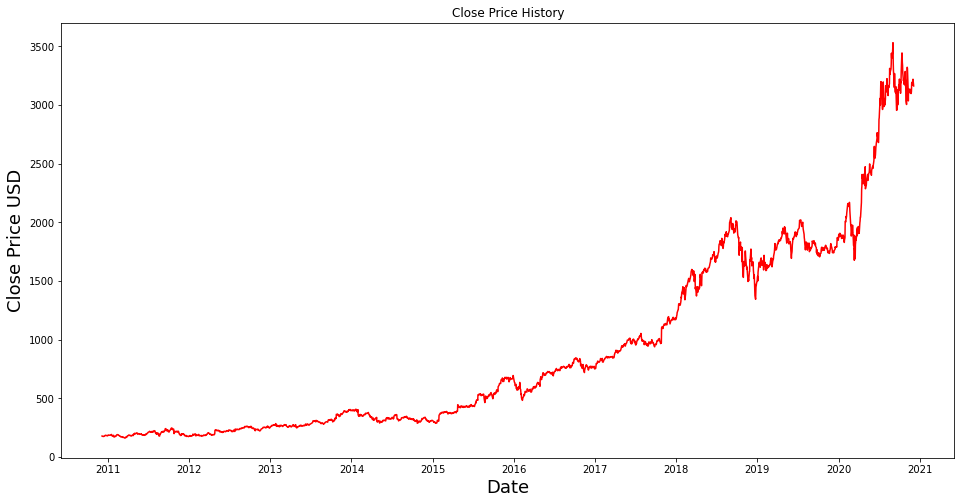

In [9]:
#plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(data['Close'], color='red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize = 18)
plt.show()

The next step is to split the data into training and test sets to avoid overfitting and to be able to investigate the generalization ability of our model. 

In [10]:
# Create a new data frame with only 'Close column'
data = data.filter(['Close'])
dataset = data.values #convert the data frame to a numpy array
training_data_len = math.ceil(len(dataset)*.7)  # number of rows to train the model on
training_data_len

1763

**Scale the data**




In [11]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00506753],
       [0.00468776],
       [0.00454534],
       ...,
       [0.90270824],
       [0.89772377],
       [0.89055865]])

# **Create the training dataset, scaled training dataset**

In [12]:
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train, y_train datasets
x_train = []
y_train = []
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00506753, 0.00468776, 0.00454534, 0.00411811, 0.00434656,
       0.00394009, 0.00384812, 0.00433173, 0.00506456, 0.00492808,
       0.0066222 , 0.00705537, 0.00705834, 0.00641452, 0.006281  ,
       0.00596947, 0.00664594, 0.00646199, 0.00564608, 0.00689813,
       0.00713251, 0.00784755, 0.0073847 , 0.00727493, 0.0070346 ,
       0.00693373, 0.00685659, 0.0072868 , 0.00824215, 0.00898388,
       0.00768436, 0.0062276 , 0.00488061, 0.0047115 , 0.00466699,
       0.00427832, 0.00696637, 0.00301737, 0.00257233, 0.00330517,
       0.00372647, 0.00377988, 0.00443853, 0.00458688, 0.00655396,
       0.00721856, 0.00748855, 0.0083905 , 0.00873763, 0.00832522,
       0.00761019, 0.00794842, 0.00757459, 0.00577069, 0.00466105,
       0.00497852, 0.00482721, 0.00365526, 0.002513  , 0.00327847])]
[0.0035069165742997455]



In [13]:
#convert the x_train and y_train  to numppy array
x_train,y_train = np.array(x_train), np.array(y_train)

In [14]:
#reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1703, 60, 1)

In [15]:
#Buil the LSTM model
model =Sequential()
model.add(LSTM(64,return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(64, return_sequences= False))
model.add(Dense(32))
model.add(Dense(1))

In [16]:
#Complie the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
#Train the model
model.fit(x_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
1703/1703 [==============================] - 60s 24ms/step - loss: 2.4789e-04
Epoch 2/10
1703/1703 [==============================] - 41s 24ms/step - loss: 1.0095e-04
Epoch 3/10
1703/1703 [==============================] - 41s 24ms/step - loss: 1.0042e-04
Epoch 4/10
1703/1703 [==============================] - 41s 24ms/step - loss: 4.8027e-05
Epoch 5/10
1703/1703 [==============================] - 41s 24ms/step - loss: 2.6818e-05
Epoch 6/10
1703/1703 [==============================] - 41s 24ms/step - loss: 3.3367e-05
Epoch 7/10
1703/1703 [==============================] - 41s 24ms/step - loss: 2.2629e-05
Epoch 8/10
1703/1703 [==============================] - 41s 24ms/step - loss: 2.6760e-05
Epoch 9/10
1703/1703 [==============================] - 43s 25ms/step - loss: 2.9809e-05
Epoch 10/10
1703/1703 [==============================] - 41s 24ms/step - loss: 2.2873e-05


In [19]:
#create the testing data sets
#create a new array containing scale values from index 1763 to 2518
test_data= scaled_data[training_data_len-60:, :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [20]:
#convert the data to a numpy array
x_test = np.array(x_test)

In [21]:
#reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))
x_test.shape

(755, 60, 1)

In [22]:
#predicting the data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [23]:
#get the root mean square error(RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.9109919997206091

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


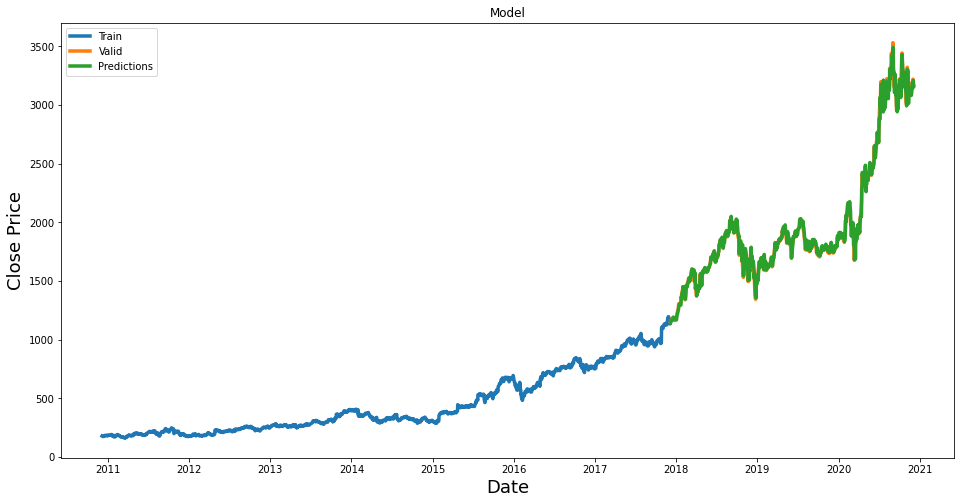

In [24]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visialization the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price' ,fontsize=18)
plt.plot(train['Close'],linewidth=3.5)
plt.plot(valid[['Close','Predictions']],linewidth=3.5)
plt.legend(['Train','Valid','Predictions'])

In [25]:
#show the valid and predicted price
valid

,Close,Predictions
Date,,
2017-12-06,1152.349976,1142.513428
2017-12-07,1159.790039,1151.617432
2017-12-08,1162.000000,1158.740356
2017-12-11,1168.920044,1160.823853
2017-12-12,1165.079956,1168.367920
...,...,...
2020-11-30,3168.040039,3175.437988
2020-12-01,3220.080078,3145.846924
2020-12-02,3203.530029,3209.381592


In [26]:
#get the quote
amzn_quote = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Time Series - Stock Price Prediction - AMZN/AMZN.csv')
#Create new data frame
new_df = amzn_quote.filter(['Close'])
#get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#scaled the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#create an empty list
X_test = []
#append the past 60 days 
X_test.append(last_60_days_scaled)
#convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))
#get the predicted scaled price
pred_price= model.predict(X_test)
#undo the scalling
pred_price = scaler.inverse_transform(pred_price)
pred_price

array([[3140.3901]], dtype=float32)

# 2. Stock Price Predicting with - The AutoRegressive Integrated Moving Average (ARIMA) model

Time-series & forecasting models Time-series forecasting models are the models that are capable to predict future values based on previously observed values. Time-series forecasting is widely used for non-stationary data. Non-stationary data are called the data whose statistical properties e.g. the mean and standard deviation are not constant over time but instead, these metrics vary over time. These non-stationary input data (used as input to these models) are usually called time-series. Some examples of time-series include the temperature values over time, stock price over time, price of a house over time etc. So, the input is a signal (time-series) that is defined by observations taken sequentially in time.A time series is a sequence of observations taken sequentially in time.



*   AR: < Auto Regressive > means that the model uses the dependent relationship 
between an observation and some predefined number of lagged observations (also known as “time lag” or “lag”).


*   I:< Integrated > means that the model employs differencing of raw observations (e.g. it subtracts an observation from an observation at the previous time step) in order to make the time-series stationary


*   MA: < Moving Average > means that the model exploits the relationship between the residual error and the observations.
Model parameters

The standard ARIMA models expect as input parameters 3 arguments i.e. p,d,q. p is the number of lag observations. d is the degree of differencing. q is the size/width of the moving average window.

In [45]:
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [48]:
Adata = pd.read_csv('/content/gdrive/MyDrive/Stock-Price-Prediction-main/Time Series - Stock Price Prediction - AMZN/AMZN.csv')
Adata['Date'] = pd.to_datetime(Adata['Date'])
Adata.set_index('Date',inplace=True)

In [49]:
Adata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2010-12-06 to 2020-12-04
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2518 non-null   float64
 1   High       2518 non-null   float64
 2   Low        2518 non-null   float64
 3   Close      2518 non-null   float64
 4   Adj Close  2518 non-null   float64
 5   Volume     2518 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.7 KB


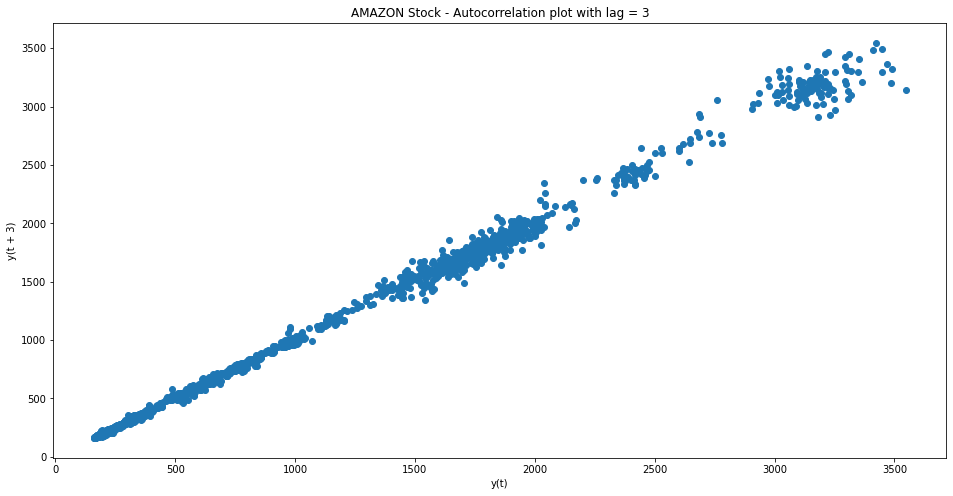

In [50]:
#Our target variable will be the Close value.
#Before building the ARIMA model, let’s see if there is some cross-correlation in our data.
plt.figure(figsize=(16,8))
lag_plot(Adata['Open'], lag=3)
plt.title('AMAZON Stock - Autocorrelation plot with lag = 3')
plt.show()


We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).

Finally, let’s plot the stock price evolution over time.

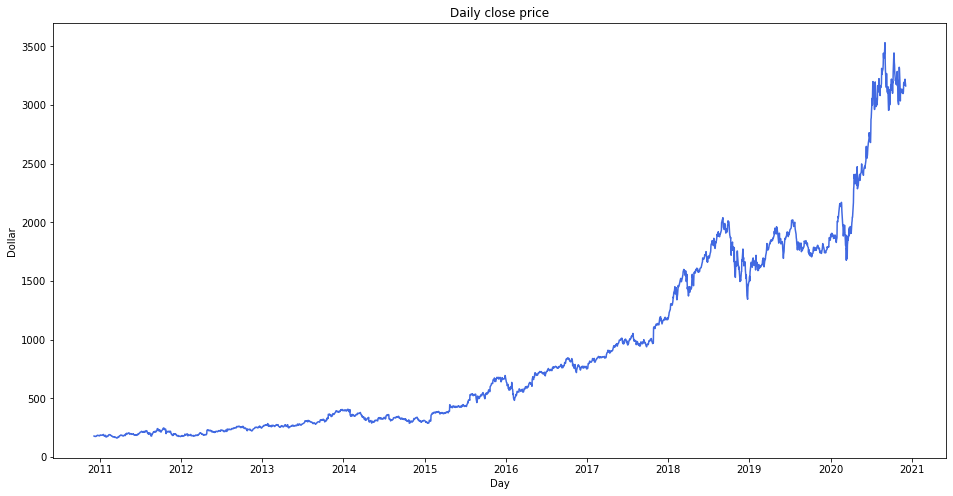

In [51]:
plt.figure(figsize=(16,8))
plt.plot(Adata.index, Adata['Close'], color='royalblue')
plt.title('Daily close price')
plt.xlabel('Day')
plt.ylabel('Dollar')
plt.show()

Build the predictive ARIMA model

Next, let’s divide the data into a training (70 % ) and test (30%) set. For this tutorial we select the following ARIMA parameters: p=4, d=1 and q=0.

In [52]:
train_data, test_data = Adata[0:int(len(Adata)*0.7)], Adata[int(len(Adata)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1977.6938758025142


Summary of the code We split the training dataset into train and test sets and we use the train set to fit the model, and generate a prediction for each element on the test set. A rolling forecasting procedure is required given the dependence on observations in prior time steps for differencing and the AR model. To this end, we re-create the ARIMA model after each new observation is received. Finally, we manually keep track of all observations in a list called history that is seeded with the training data and to which new observations are appended at each iteration. Testing Mean Squared Error is **1977.6938758025142**

The MSE of the test set is quite large denoting that the precise prediction is a hard problem. However, this is the average squared value across all the test set predictions. Let’s visualize the predictions to understand the performance of the model more.

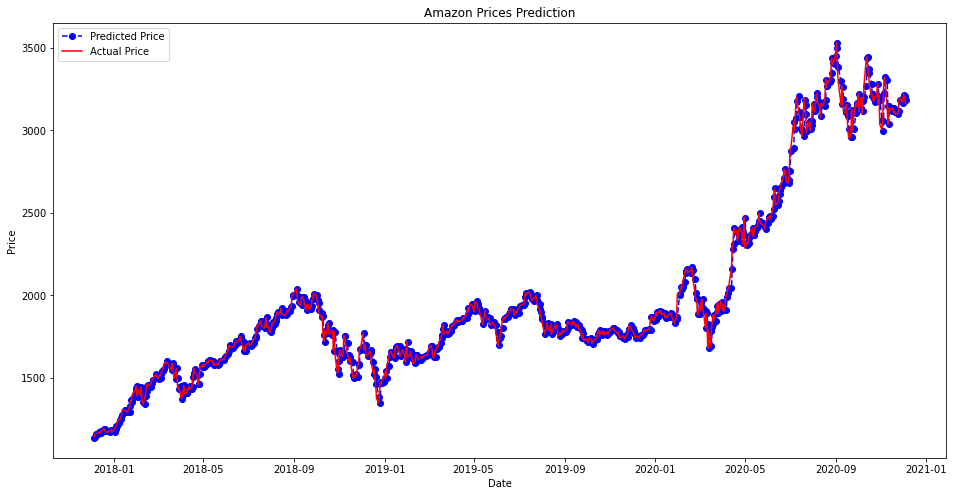

In [53]:
test_set_range = Adata[int(len(Adata)*0.7):].index
plt.figure(figsize=(16,8))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Amazon Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

**ARIMA model performance on the test set**

Our ARIMA model results in appreciable results. This model offers a good prediction accuracy and to be relatively fast compared to LSTM, in terms of training/fitting time and complexity.